In [20]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug = pd.read_csv(mouse_drug_data_to_load, encoding="UTF-8")
clinical_trial = pd.read_csv(clinical_trial_data_to_load, encoding="UTF-8")

# Combine the data into a single dataset
mouse_clinical = clinical_trial.merge(mouse_drug,on="Mouse ID")

# Display the data table for preview

mouse_clinical.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumor Response to Treatment

In [21]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
mean_tumer_volume = mouse_clinical.groupby(["Drug","Timepoint"]).mean()["Tumor Volume (mm3)"]

# Convert to DataFrame
mean_tumer_volume = mean_tumer_volume.to_frame().reset_index()

# Preview DataFrame
mean_tumer_volume.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [22]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
sem_tumer_volume = mouse_clinical.groupby(["Drug","Timepoint"]).sem()["Tumor Volume (mm3)"]

# Convert to DataFrame
sem_tumer_volume = sem_tumer_volume.to_frame().reset_index()

# Preview DataFrame)
sem_tumer_volume.head()



,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [23]:
# Minor Data Munging to Re-Format the Data Frames
mean_tumer_volume_formatted = mean_tumer_volume.pivot(index='Timepoint',columns='Drug')
mean_tumer_volume_formatted.columns = mean_tumer_volume_formatted.columns.droplevel() 

# Preview that Reformatting worked
mean_tumer_volume_formatted.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


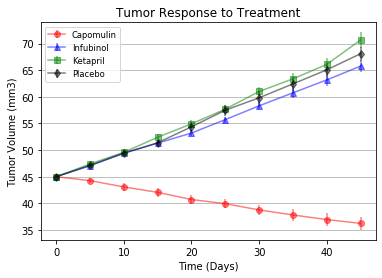

In [24]:
# Generate the Plot (with Error Bars)
fig, ax = plt.subplots()
timeplots = mean_tumer_volume_formatted.index

ax.errorbar(timeplots,mean_tumer_volume_formatted["Capomulin"] , yerr=sem_tumer_volume.loc[sem_tumer_volume["Drug"]=="Capomulin"]["Tumor Volume (mm3)"], fmt="-o", color="r",alpha=0.5, label="Capomulin")
ax.errorbar(timeplots,mean_tumer_volume_formatted["Infubinol"] , yerr=sem_tumer_volume.loc[sem_tumer_volume["Drug"]=="Infubinol"]["Tumor Volume (mm3)"], fmt="-^", color="b",alpha=0.5, label="Infubinol")
ax.errorbar(timeplots,mean_tumer_volume_formatted["Ketapril"] , yerr=sem_tumer_volume.loc[sem_tumer_volume["Drug"]=="Ketapril"]["Tumor Volume (mm3)"], fmt="-s", color="g",alpha=0.5, label="Ketapril")
ax.errorbar(timeplots,mean_tumer_volume_formatted["Placebo"] , yerr=sem_tumer_volume.loc[sem_tumer_volume["Drug"]=="Placebo"]["Tumor Volume (mm3)"], fmt="-d", color="k",alpha=0.5, label="Placebo")

ax.set_title("Tumor Response to Treatment")
ax.set_xlabel("Time (Days)")
ax.set_ylabel("Tumor Volume (mm3)")
ax.yaxis.grid()
plt.legend(loc="best", fontsize="small", fancybox=True)

# Save the Figure
plt.show()


In [25]:
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [26]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
mean_meta_response = mouse_clinical.groupby(["Drug","Timepoint"]).mean()["Metastatic Sites"]

# Convert to DataFrame
mean_meta_response = mean_meta_response.to_frame().reset_index()

# Preview DataFrame
mean_meta_response.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [27]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
sem_meta_response = mouse_clinical.groupby(["Drug","Timepoint"]).sem()["Metastatic Sites"]

# Convert to DataFrame
sem_meta_response = sem_meta_response.to_frame().reset_index()

# Preview DataFrame
sem_meta_response.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [28]:
# Minor Data Munging to Re-Format the Data Frames
mean_meta_response_formatted = mean_meta_response.pivot(index='Timepoint',columns='Drug')
mean_meta_response_formatted.columns = mean_meta_response_formatted.columns.droplevel() 

# Preview that Reformatting worked
mean_meta_response_formatted.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


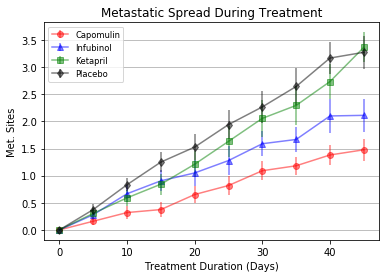

In [29]:
# Generate the Plot (with Error Bars)
fig, ax = plt.subplots()
timeplots = mean_meta_response_formatted.index

ax.errorbar(timeplots,mean_meta_response_formatted["Capomulin"] , yerr=sem_meta_response.loc[sem_meta_response["Drug"]=="Capomulin"]["Metastatic Sites"], fmt="-o", color="r",alpha=0.5, label="Capomulin")
ax.errorbar(timeplots,mean_meta_response_formatted["Infubinol"] , yerr=sem_meta_response.loc[sem_meta_response["Drug"]=="Infubinol"]["Metastatic Sites"], fmt="-^", color="b",alpha=0.5, label="Infubinol")
ax.errorbar(timeplots,mean_meta_response_formatted["Ketapril"] , yerr=sem_meta_response.loc[sem_meta_response["Drug"]=="Ketapril"]["Metastatic Sites"], fmt="-s", color="g",alpha=0.5, label="Ketapril")
ax.errorbar(timeplots,mean_meta_response_formatted["Placebo"] , yerr=sem_meta_response.loc[sem_meta_response["Drug"]=="Placebo"]["Metastatic Sites"], fmt="-d", color="k",alpha=0.5, label="Placebo")

ax.set_title("Metastatic Spread During Treatment")
ax.set_xlabel("Treatment Duration (Days)")
ax.set_ylabel("Met. Sites")
ax.yaxis.grid()
plt.legend(loc="best", fontsize="small", fancybox=True)
# Save the Figure

# Show the Figure
plt.show()

## Survival Rates

In [30]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
survival_rates = mouse_clinical.groupby(["Drug","Timepoint"]).count()["Mouse ID"]

# Convert to DataFrame
survival_rates = survival_rates.to_frame().reset_index()
survival_rates = survival_rates.rename(columns={"Mouse ID":"Mouse Count"})

# Preview DataFrame
survival_rates.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [31]:
# Minor Data Munging to Re-Format the Data Frames
survival_rates_formatted = survival_rates.pivot(index='Timepoint',columns='Drug')
survival_rates_formatted.columns = survival_rates_formatted.columns.droplevel() 

# Preview the Data Frame
survival_rates_formatted.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


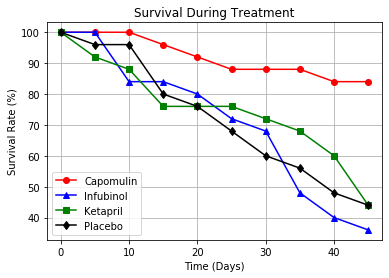

In [32]:
# Generate the Plot (Accounting for percentages)
starting_mice = survival_rates_formatted.iloc[0]
survival_rates_formatted = 100*(survival_rates_formatted/starting_mice)
survival_rates_subset = survival_rates_formatted[["Capomulin","Infubinol","Ketapril","Placebo"]]
survival_plot = survival_rates_subset.plot(kind="line",grid=True,style=['ro-','b^-','gs-','kd-'],xlim=(survival_rates_formatted.index.min()-2,survival_rates_formatted.index.max()+2),title="Survival During Treatment",legend=False)

survival_plot.set_xlabel("Time (Days)")
survival_plot.set_ylabel("Survival Rate (%)")
survival_plot.legend(["Capomulin","Infubinol","Ketapril","Placebo"]);

# Save the Figure

# Show the Figure
plt.show()

## Summary Bar Graph

In [33]:
# Calculate the percent changes for each drug

first_row = mean_tumer_volume_formatted.iloc[0]
last_row = mean_tumer_volume_formatted.iloc[len(mean_tumer_volume_formatted)-1]

drug_pct = 100*((last_row-first_row)/first_row)

# Display the data to confirm
drug_pct

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

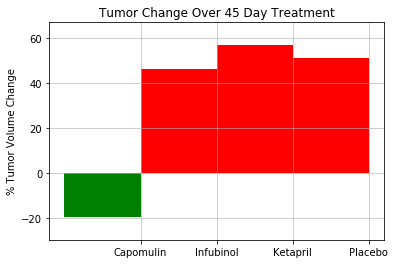

In [76]:
# Store all Relevant Percent Changes into a Tuple
drug_pct_tuple = tuple(drug_pct)

# Splice the data between passing and failing drugs

passing_drugs = tuple(drug_pct.loc[drug_pct<0])
failing_drugs = tuple(drug_pct.loc[drug_pct>=0])

# Orient widths. Add labels, tick marks, etc. 
plt.figure(figsize=(6, 4))

colors = []
for i in ["Capomulin","Infubinol","Ketapril","Placebo"]:
    if drug_pct[i]<0:
        colors.append('g')
    else:
        colors.append('r')
        
drugs = ["Capomulin","Infubinol","Ketapril","Placebo"]
subset_pct = drug_pct.loc[drugs]
x_axis = np.arange(len(drugs))

my_bar_chart = plt.bar(x_axis, subset_pct, align="edge",width=-1,color=colors)
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drugs)
plt.xlim(-1.2, len(x_axis)-.8)
plt.ylim(min(subset_pct)-10, max(subset_pct)+10)

plt.title("Tumor Change Over 45 Day Treatment")
plt.ylabel("% Tumor Volume Change")
plt.grid(alpha=0.75)

rects = my_bar_chart.patches

# Make some labels.
labels = ["label%d" % i for i in range(len(rects))]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 5, 'TEst',
            ha='center', va='bottom')

# Use functions to label the percentages of changes

# Call functions to implement the function calls
plt.show()

# Save the Figure


# Show the Figure
